In [1]:
# generate future y values using past x values AND greater offset y values 

In [4]:
import pandas as pd
import numpy as np
import os
import shutil
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt
import re

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, mean_absolute_error



from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout


from tensorflow.keras.models import load_model

In [5]:

def convert_to_dataframe(x):
    return pd.DataFrame(x)


In [6]:
def create_sequences(features, target, seq_length, y_offset):
    X, y = [], []
    for i in range(seq_length, len(features)):
        # Current features sequence
        current_features = features[i-seq_length:i]
        
        # Offset previous y values sequence
        if i - seq_length - y_offset >= 0:
            offset_prev_y = target[i-seq_length-y_offset:i-y_offset]
        else:
            # If the offset is larger than the available data, fill with zeros or appropriate value
            offset_prev_y = np.zeros((seq_length, 1))
        
        # Combine current features with offset previous y values
        combined = np.hstack((current_features, offset_prev_y))
        
        X.append(combined)
        y.append(target[i])
    
    return np.array(X), np.array(y)



In [7]:
def predict_future(model, data, seq_length, future_steps):
    future_predictions = []
    current_sequence = data[-seq_length:].reshape(1, seq_length, data.shape[1])
    
    return(current_sequence)

In [8]:
df = pd.read_csv(r'C:\Users\whiter04\OneDrive - Johnson Matthey\00. cspark\ELY\ELY-TimeSeries\Data\master_data_frame.csv')
df_copy = df.copy()
df_copy = df_copy.drop('Unnamed: 0',axis=1) 
df_copy


to_drop = ['temp_anode_inlet_set', 
           'temp_cathode_inlet_set', 
           'pressure_anode_set',
           'pressure_cathode_set', 
           'flow_anode_di_water_supply_set', 
           'flow_cathode_di_water_supply_set', 
          'flow_cathode_di_water_supply', 
           'signal_in_o2_in_h2_sensor']

df_copy = df_copy.drop(to_drop, axis=1)
df_copy


df_copy['seconds'] = (df_copy['time_running_total']/1000).astype(int)
df_copy['minutes'] = (df_copy['seconds']/60).astype(int)

# df_copy['hours'] = (df_copy['minutes']/60).astype(int)
# df_copy['days'] = (df_copy['hours']/24).astype(int)
# df_copy['weeks'] = (df_copy['days']/7).astype(int)
df_copy = df_copy.drop('time_running_total',axis=1)

# df_copy = df_copy.tail(150000)
df_copy

,cell_voltage_001,current,current_density,temp_anode_inlet,temp_anode_outlet,temp_cathode_inlet,temp_cathode_outlet,pressure_anode_inlet,pressure_anode_outlet,pressure_cathode_inlet,pressure_cathode_outlet,flow_anode_di_water_supply,signal_in_resistivity_anode,signal_in_resistivity_cathode,signal_in_h2_in_o2_sensor,seconds,minutes
0,-0.095167,-0.01262,-0.000505,22.524658,22.211363,22.943993,22.664978,0.015911,-0.026205,-0.009285,-0.009439,0.149858,0.142337,0.580925,0.278146,0,0
1,-0.095167,-0.01262,-0.000505,22.524658,22.211363,22.943993,22.664978,0.015911,-0.026205,-0.009285,-0.009439,0.149858,0.142337,0.580925,0.278146,0,0
2,-0.095167,-0.01262,-0.000505,22.524658,22.211363,22.943993,22.664978,0.015911,-0.026205,-0.009285,-0.009439,0.149858,0.142337,0.580925,0.278146,0,0
3,-0.095167,-0.01192,-0.000477,23.574999,22.622944,22.930300,22.651320,0.184089,-0.026205,-0.009285,-0.001021,0.270174,0.132591,0.585798,0.276583,30,0
4,-0.095167,-0.01192,-0.000477,23.574999,22.622944,22.930300,22.651320,0.184089,-0.026205,-0.009285,-0.001021,0.270174,0.132591,0.585798,0.276583,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461237,1.879790,75.00482,3.000193,79.819145,78.329117,29.627552,34.574463,1.992006,1.723834,6.002450,6.019177,0.300858,0.230055,0.152083,0.104703,4934550,82242
461238,1.879790,75.00482,3.000193,79.819145,78.329117,29.627552,34.574463,1.992006,1.723834,6.002450,6.019177,0.300858,0.230055,0.152083,0.104703,4934550,82242
461239,1.880171,75.00482,2.999912,79.819145,78.354111,29.627552,34.560806,1.992006,1.723834,6.002450,5.960248,0.300858,0.215435,0.156957,0.103140,4934580,82243
461240,1.880171,75.00482,2.999912,79.819145,78.354111,29.627552,34.560806,1.992006,1.723834,6.002450,5.960248,0.300858,0.215435,0.156957,0.103140,4934580,82243


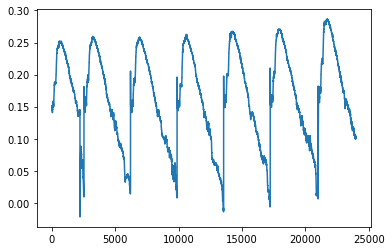

,cell_voltage_001,current,signal_in_h2_in_o2_sensor
minutes,,,
2024-06-24 08:37:00,1.863963,74.997810,0.145329
2024-06-24 08:38:00,1.864345,75.001315,0.145329
2024-06-24 08:39:00,1.864345,74.997810,0.145329
2024-06-24 08:40:00,1.864154,74.997810,0.145329
2024-06-24 08:41:00,1.864345,75.001315,0.145329
...,...,...,...
2024-07-12 02:39:00,1.879218,74.993604,0.101265
2024-07-12 02:40:00,1.879294,75.000614,0.103140
2024-07-12 02:41:00,1.879599,74.996408,0.103140


In [9]:
import matplotlib.pyplot as plt

time_period = 'minutes'

df_time = df_copy.groupby(time_period).mean().reset_index()

downsampled_df = df_time.tail(24000).reset_index()

downsampled_df = downsampled_df[['minutes','cell_voltage_001','current','signal_in_h2_in_o2_sensor']]

downsampled_df[time_period] = pd.to_datetime('2024-05-16 00:00:00') + pd.to_timedelta(downsampled_df[time_period], unit='m')



plt.plot(downsampled_df['signal_in_h2_in_o2_sensor'])

plt.show()

downsampled_df = downsampled_df.set_index('minutes')
downsampled_df

In [10]:

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),

])

# Fit and transform the data


features = downsampled_df.drop(columns= ['signal_in_h2_in_o2_sensor'])
target = downsampled_df['signal_in_h2_in_o2_sensor']


features_trans = pipeline.fit_transform(features)
target_trans = pipeline.fit_transform(pd.DataFrame(target))



seq_length = 1  # Using  to predict the next minute
y_offset = 7000
X, y = create_sequences(features_trans, target_trans, seq_length, y_offset)

In [11]:


train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]



In [2]:
loaded_model = load_model('best_model.keras')

# Verify the model architecture
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             10800     
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            91648     
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             49408     
                                                                 
 lstm_3 (LSTM)               (None, 1, 10)             3000      
                                                                 
 lstm_4 (LSTM)               (None, 1, 10)             840       
                                                                 
 lstm_5 (LSTM)               (None, 1, 10)             8

In [14]:
predictions = loaded_model.predict(X_test)

150/150 [==============================] - 1s 4ms/step


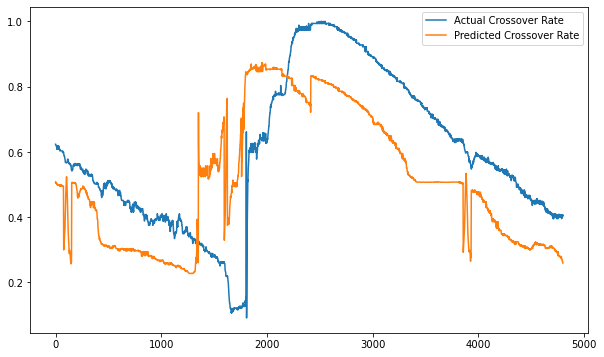

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Crossover Rate')
plt.plot(predictions, label='Predicted Crossover Rate')
plt.legend()
plt.show()

In [70]:
X.shape

(23999, 1, 3)

In [77]:
model = Sequential([
    LSTM(10, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
#     Use Dropout Regularization: Adding dropout can help prevent overfitting
    Dropout(0.2),
    LSTM(50, return_sequences=True),
#     Dropout(0.2),
#     LSTM(10),
#     Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 1, 10)             560       
                                                                 
 dropout_13 (Dropout)        (None, 1, 10)             0         
                                                                 
 lstm_16 (LSTM)              (None, 1, 50)             12200     
                                                                 
 dense_5 (Dense)             (None, 1, 1)              51        
                                                                 
Total params: 12811 (50.04 KB)
Trainable params: 12811 (50.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)

# with open('model_3.pkl', 'wb') as file:
#     pickle.dump(model, file)


Epoch 1/30
600/600 [==============================] - 5s 3ms/step - loss: 0.2186
Epoch 2/30
600/600 [==============================] - 3s 5ms/step - loss: 0.1866
Epoch 3/30
600/600 [==============================] - 3s 5ms/step - loss: 0.1845
Epoch 4/30
600/600 [==============================] - 3s 5ms/step - loss: 0.1834
Epoch 5/30
600/600 [==============================] - 3s 6ms/step - loss: 0.1810
Epoch 6/30
600/600 [==============================] - 3s 5ms/step - loss: 0.1755
Epoch 7/30
600/600 [==============================] - 3s 5ms/step - loss: 0.1691
Epoch 8/30
600/600 [==============================] - 3s 4ms/step - loss: 0.1650
Epoch 9/30
600/600 [==============================] - 3s 5ms/step - loss: 0.1602
Epoch 10/30
600/600 [==============================] - 3s 5ms/step - loss: 0.1535
Epoch 11/30
600/600 [==============================] - 2s 4ms/step - loss: 0.1493
Epoch 12/30
600/600 [==============================] - 2s 4ms/step - loss: 0.1474
Epoch 13/30
600/600 [====

In [74]:
loss = model.evaluate(X_test, y_test)
loss

150/150 [==============================] - 1s 2ms/step - loss: 0.1398


0.1398477554321289

In [75]:
predictions = model.predict(X_test)


150/150 [==============================] - 1s 2ms/step


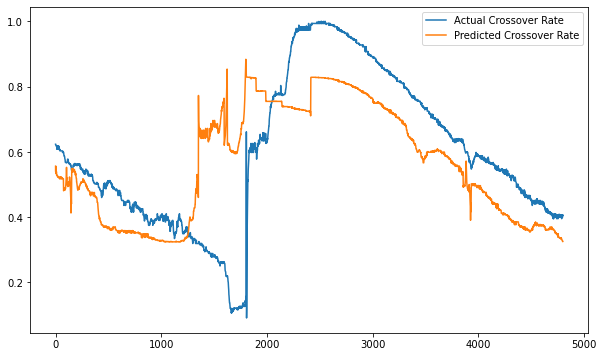

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Crossover Rate')
plt.plot(predictions, label='Predicted Crossover Rate')
plt.legend()
plt.show()

In [60]:
predictions_train = model.predict(X_train)


600/600 [==============================] - 3s 3ms/step


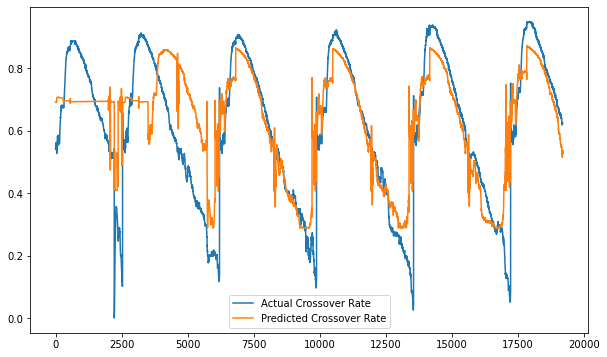

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(y_train, label='Actual Crossover Rate')
plt.plot(predictions_train, label='Predicted Crossover Rate')
plt.legend()
plt.show()

In [47]:

def generate_future(X, y_preds):
    X_futures = []
    n=0
    
    for i in X:
        d = [list(i[0])]
        d[0][2] = y_preds[n][0]
        
        X_futures.append([d[0]])
        n+=1
    X_futures = np.array(X_futures)
    
    return X_futures
    
        



In [48]:
x_f = generate_future(X_train,predictions_train)

In [49]:
predictions_f = model.predict(x_f)

600/600 [==============================] - 1s 2ms/step


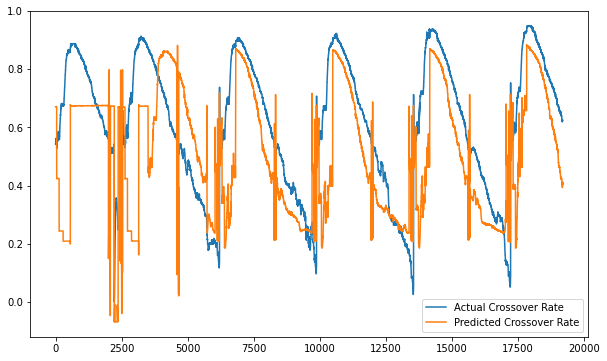

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(y_train, label='Actual Crossover Rate')
plt.plot(predictions_f, label='Predicted Crossover Rate')
plt.legend()
plt.show()